In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#Data
heart_data = pd.read_csv("./Resources/heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check Heart Attack Presence Data Distribution
heart_data["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

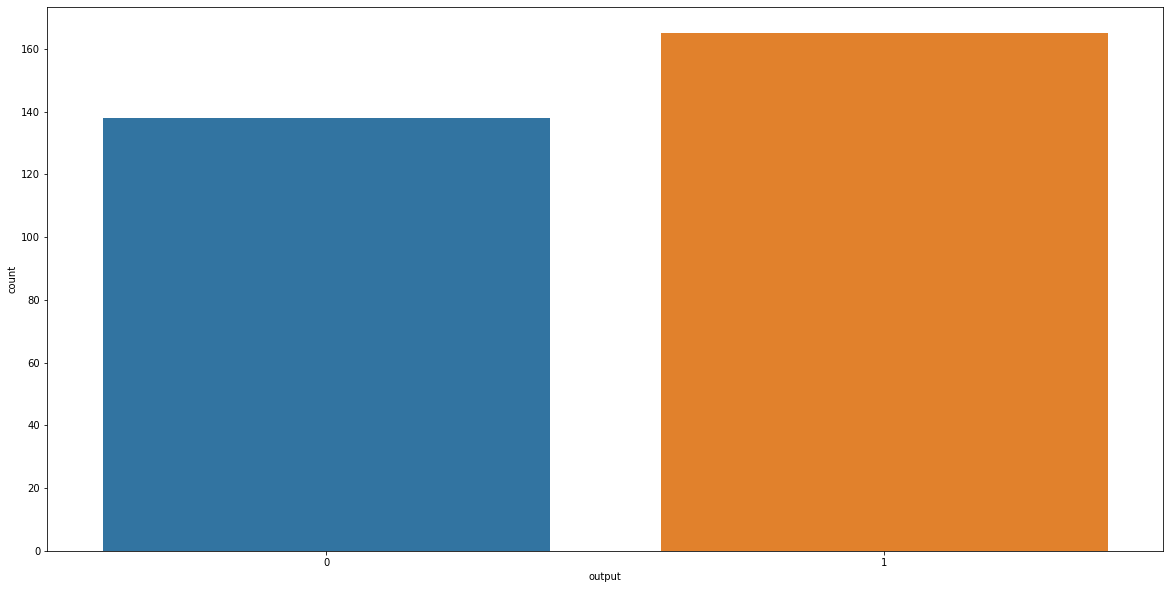

In [4]:
# Plot Data Distribution
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="output", data=heart_data)

In [5]:
# Check for null values
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

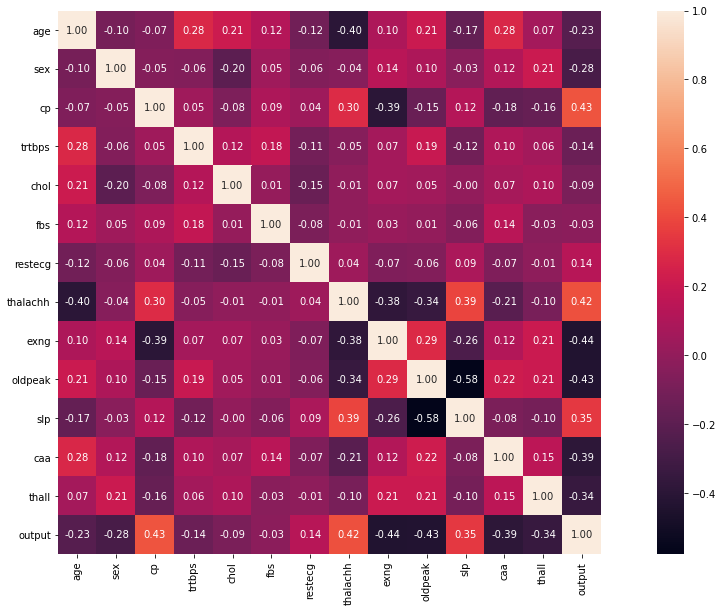

In [6]:
# Run a correlation matrix to see how variables interact
cols = heart_data.columns
cm = np.corrcoef(heart_data.values.T)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
cm_2 = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, 
                                                                                              xticklabels=cols.values)

In [7]:
# Check presence of chest pain values
heart_data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest Pain v. Heart Attack')

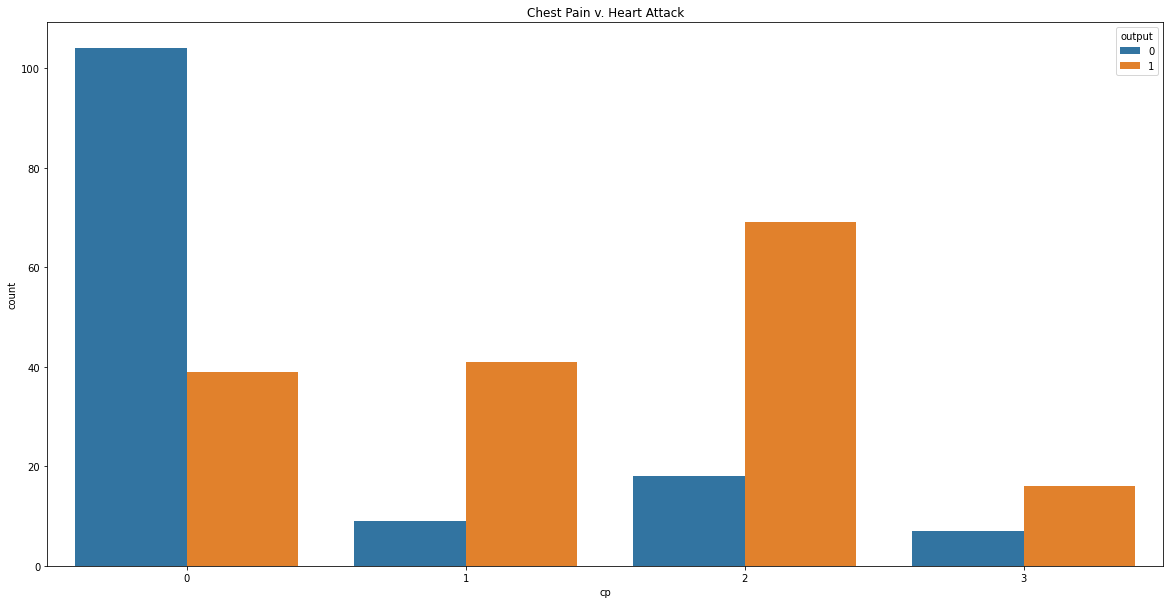

In [8]:
# Plot how chest pain interacts with heart attck data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="cp", data=heart_data, hue="output")
plt.title("Chest Pain v. Heart Attack")

Text(0.5, 1.0, 'Age v. Heart Rate')

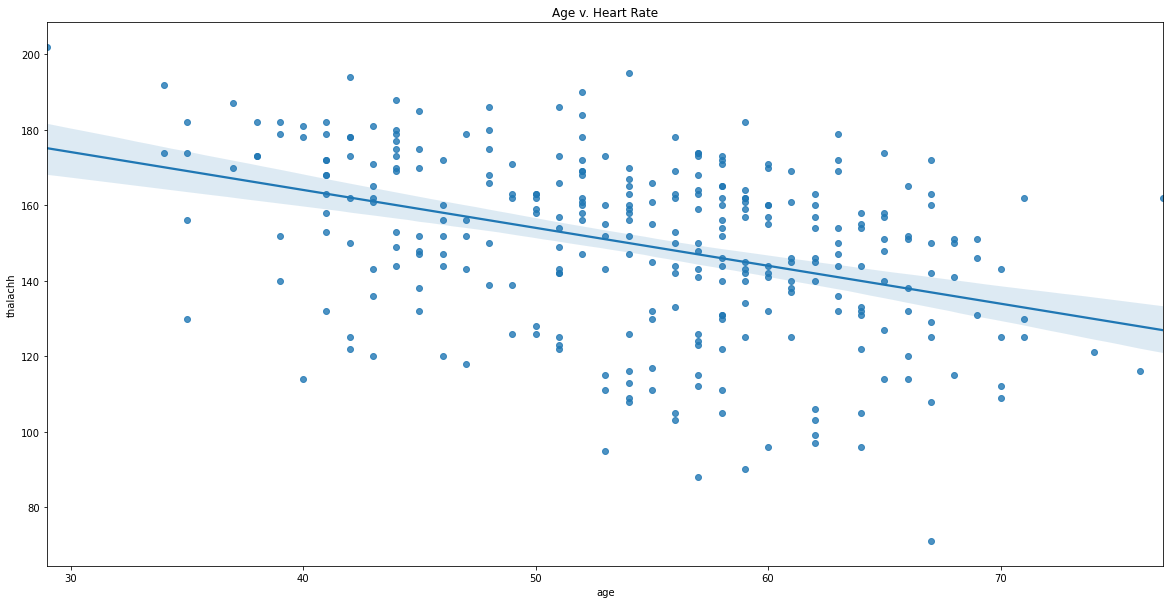

In [9]:
# Plot how age interacts with heart attck data
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.regplot(x="age", y="thalachh", data=heart_data)
plt.title("Age v. Heart Rate")

Text(0.5, 1.0, 'Heart Rate v. Heart Attacks')

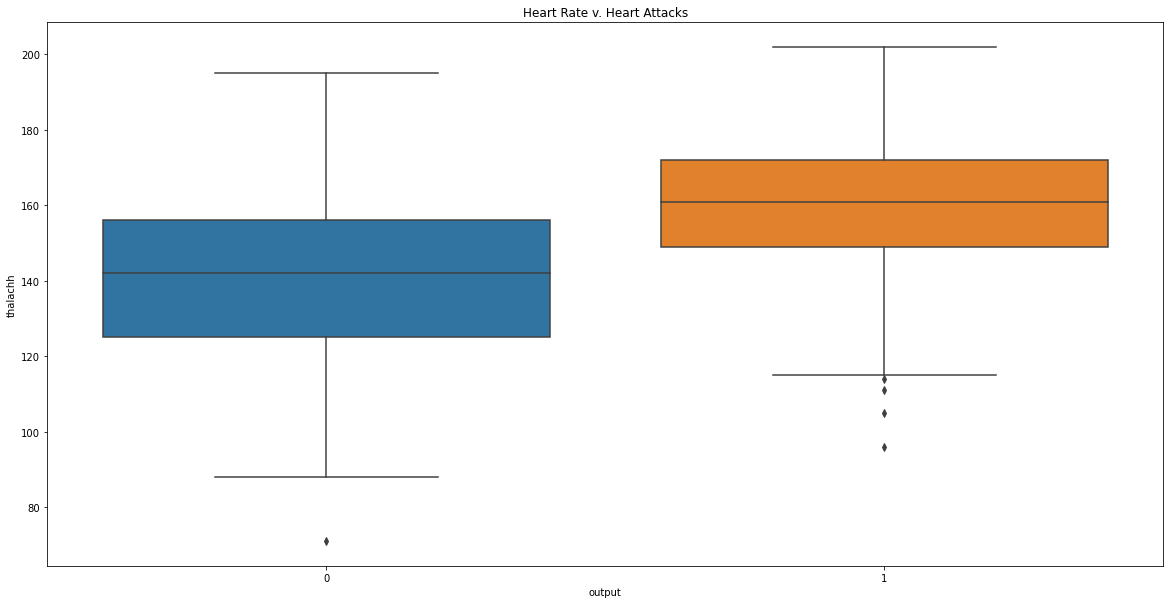

In [10]:
# Plot how heart rate interacts with heart attck data in a boxplot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(x="output", y="thalachh", data=heart_data)
plt.title("Heart Rate v. Heart Attacks")

Text(0.5, 1.0, 'Heart Rate v. Heart Attacks')

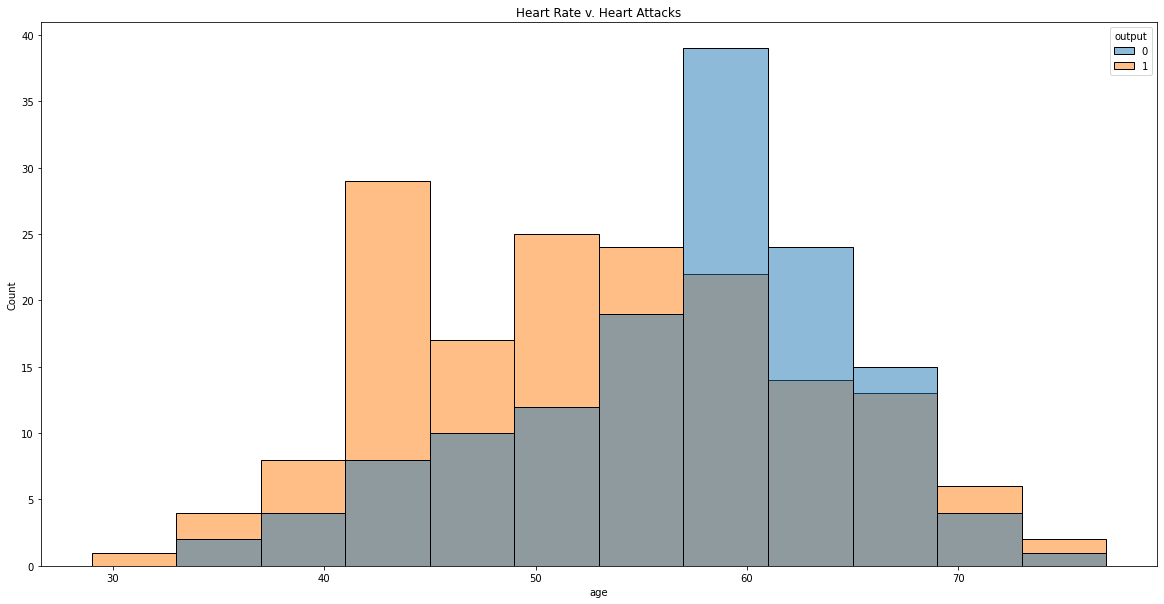

In [11]:
# Plot how heart rate interacts with heart attck data in a histogram
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.histplot(x="age", data=heart_data, hue="output")
plt.title("Heart Rate v. Heart Attacks")

In [12]:
# Assign data to variables
X = heart_data.drop(["output"], axis=1)
y = heart_data["output"]

In [13]:
# Split data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [14]:
# Fit data to random forest ML model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [15]:
x, y = (list(x) for x in zip(*sorted(zip(random_forest.feature_importances_, X_train.columns), reverse = True)))

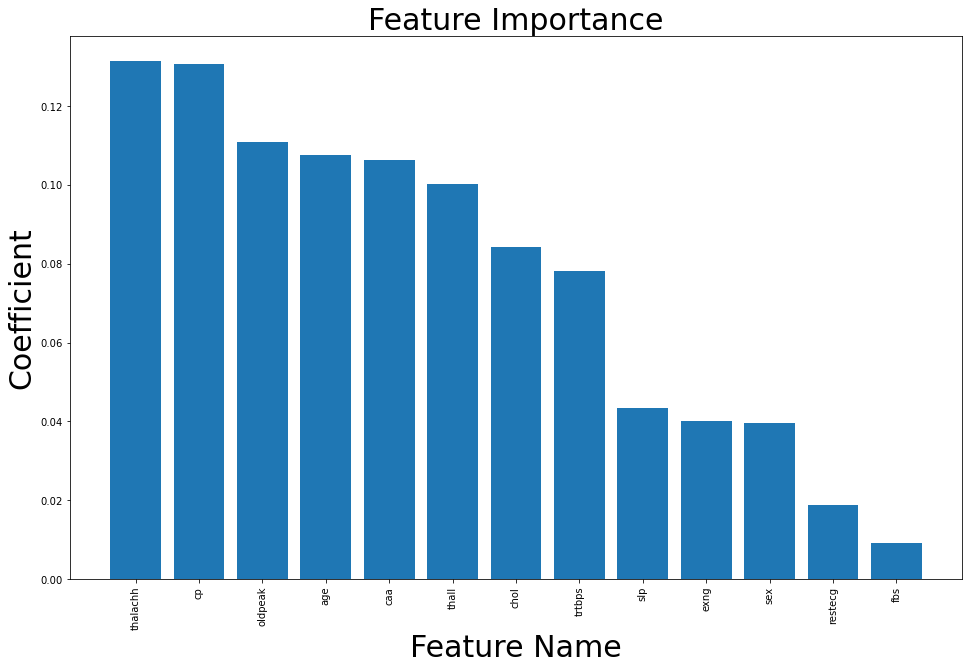

In [16]:
# Plot feature importance in Random Forest Model
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.bar(y, x)
plt.title("Feature Importance", size=30)
plt.xlabel("Feature Name", size=30)
plt.ylabel("Coefficient", size=30)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.show()

In [40]:
# Create a loop to grab only important features
important_features = []
for name, importance in zip(X_train.columns, random_forest.feature_importances_):
    if importance > 0.06:
        important_features.append(name)

In [41]:
# Save important features in variables
X_train = X_train.loc[:, important_features]
X_test = X_test.loc[:, important_features]

In [42]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Import four different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Assign Models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
xgb = XGBClassifier()

In [ ]:
# Run tests to see which ML models are most effective
all_models = [rf, dt, svm, xgb]
for clf in all_models:
    print("model: " + str(clf))
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("accuracy: " + str(accuracy))
    print("__________")

In [24]:
# Create a baseline prediction algorithm 
majority_predictions = np.ones(len(X_test))
baseline = accuracy_score(y_test, majority_predictions)
baseline

0.5394736842105263

In [25]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [26]:
# Search for best RF Model params
params = {"bootstrap": [True, False], 
          "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          "max_features": ["auto", "sqrt"], 
          "min_samples_leaf": [1, 2, 3, 4],
          "min_samples_split": [2, 5, 10],
          "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }
rf = RandomForestClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_estimator
RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_hyper_parameters
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [27]:
# Save best RF model predictor and test for accuracy
best_rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_rf.fit(X_train_scaled, y_train)
predictions = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

accuracy: 0.8289473684210527
__________


In [28]:
# Search for best XG Model params
params_xg = {
            "min_child_weight": [1, 5, 10],
            "gamma": [0.5, 1, 1.5, 2, 2.5],
            "subsample": [0.6, 0.8, 1],
            "colsample_bytree": [0.6, 0.8, 1],
            "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         }
xg = XGBClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(xg, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Christopher\anaconda2\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_estimator
XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_const

In [29]:
# Save best XG model predictor and test for accuracy
best_xg = XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=40, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=3, min_samples_split=10,
              monotone_constraints='()', n_estimators=1200,
              n_jobs=4, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_xg.fit(X_train_scaled, y_train)
predictions = best_xg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

[19:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.7105263157894737
__________


In [30]:
# Scale data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
scores = cross_val_score(rf, X_scaled, y, cv=5)
print(np.mean(scores))
print(scores)

ValueError: Found input variables with inconsistent numbers of samples: [303, 13]